<a href="https://colab.research.google.com/github/Maverick269/ML_Clusturing_Project/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project Name - Online Retail Customer Segmentation***



# **Project Type - Clusturing**


## Contribution - Individual
## Name - Aman

## GitHub Link - https://github.com/Maverick269/ML_Clusturing_Project

* GitHub Id: https://github.com/Maverick269

* Linkedin Id: www.linkedin.com/in/aman-kumar-9598a61ab

# **Project Summary**


### The aim of this machine learning project is to perform customer segmentation for an online retail business. Customer segmentation involves dividing a customer base into distinct groups based on shared characteristics, behaviors, or preferences. By effectively segmenting customers, businesses can gain valuable insights and tailor their marketing strategies to specific customer groups, leading to improved customer satisfaction and increased profitability.

### After basic exploration and cleaning the data we found relationships between features in EDA and then jumped into the analysis part. RFM analysis helped us to identify the Platinum and Gold Customers who brings more profit for the Online retail stores as well helped to focus on Silver and Broze type of customer by organising some attractive offers for them.

### We implemented various unsupervised machine learning algorithm such as KMeans Clustering, DBSCAN Algorithm , Hierarchical Clustering(Agglomerative Clustering). Here to find the Optimal number of clusters we used Elbow method as well as used a Elbow Visulizers by Yellow bricks from Scikit Learn library. Also we used Silhouette Score and Silhouette Plot to visualize the clusters with different number of clusters. For Agglomerative Clustering we used Dendogram to find the optimal number of clusters.

## **<b> Problem Description </b>**

### In this project, our task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.



### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **1. Know Your Data**

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn import preprocessing

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

## Loading/Reading Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path='/content/drive/MyDrive/Colab Notebooks/Copy of Online Retail.xlsx - Online Retail.csv'

In [6]:
# Read The Datset "Online Retail"
retail_df=pd.read_csv(path)

## Dataset First View


In [7]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


## Dataset Rows & Columns count

In [8]:
# shape of dataset
retail_df.shape

(541909, 8)

## Dataset Information

In [9]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# **2. Understanding the Variables**

## Variables Description

In [10]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# **3. Data Wrangling:**

In [11]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### **Observations**

* ***If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.***
* ***There are null values in CustomerID and Description.***

## Checking For Null Values

In [12]:
# Let's check the null values count.
retail_df.isnull().sum().sort_values(ascending=False)

,0
CustomerID,135080
Description,1454
StockCode,0
InvoiceNo,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


Text(0.5, 1.0, ' Visualizing Missing Values')

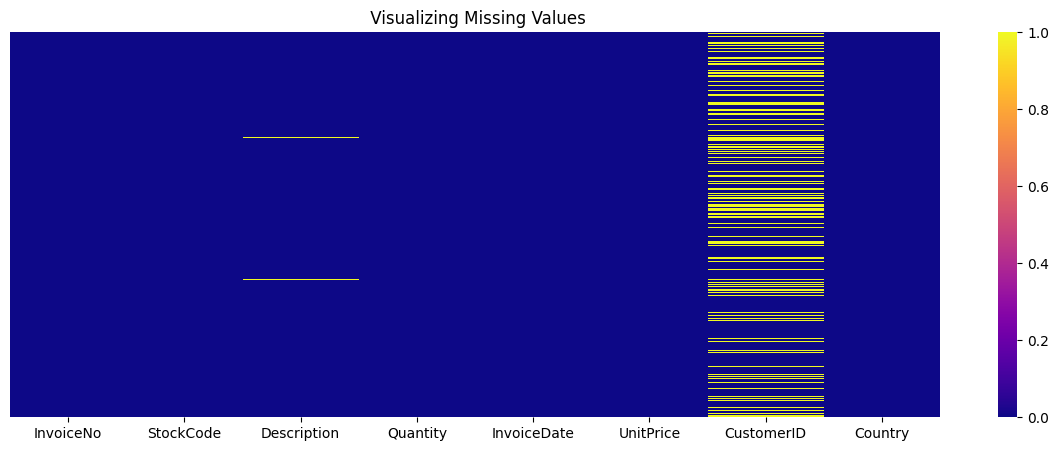

In [13]:
# Visulaizing null values using the heatmap.

plt.figure(figsize=(15,5))
sns.heatmap(retail_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualizing Missing Values")

### **Observations**


*   ***There are Null values in 'CustomerID' and 'Description' columns.***
*   ***CustomerID is our identification feature so if its missing means other features wont helpful to us in analysis***
*   ***So, we will have to drop these missing datapoints***







In [14]:
retail_df.dropna(inplace=True)

In [15]:
retail_df.shape

(406829, 8)

***Our data got reduced.So we have 8 features and 406829 records***

In [16]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


* ***Here we can see that the min value for Quantity column is negative.***
* ***UnitPrice has 0 as min value***
* ***We need to Explore these columns***

In [17]:
retail_df[retail_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [18]:
# If InvoiceNo starts with C means it's a cancellation. We need to drop these entries also.

# changing the datatype to str
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')

retail_df=retail_df[~retail_df['InvoiceNo'].str.contains('C')]

In [19]:
# Checking how many values are present for unitprice==0
len(retail_df[retail_df['UnitPrice']==0])

40

In [20]:
# almost 40 values are present so will drop this values by keeping unitprice values greater than 0.
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [21]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [22]:
retail_df.shape

(397884, 8)

### Now we are left with 397884 records and 8 columns.

# **Feature Engineering & Data Pre-processing**

In [23]:
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], dayfirst=True, errors='coerce')

/tmp/ipython-input-23-2605024175.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], dayfirst=True, errors='coerce')


In [24]:
retail_df["year"] = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df["month_num"] = retail_df["InvoiceDate"].apply(lambda x: x.month)
retail_df["day_num"] = retail_df["InvoiceDate"].apply(lambda x: x.day)
retail_df["hour"] = retail_df["InvoiceDate"].apply(lambda x: x.hour)
retail_df["minute"] = retail_df["InvoiceDate"].apply(lambda x: x.minute)

In [25]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [26]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

In [27]:
 # creating a new calculated column for the amount spend on each sale.
retail_df['TotalAmount']=retail_df['Quantity']*retail_df['UnitPrice']

In [28]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1,12,8,26,January,Tuesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,January,Tuesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1,12,8,26,January,Tuesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,January,Tuesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,January,Tuesday,20.34


# **EDA(Exploratory Data Analysis)**

In [29]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

In [30]:
# Top 10 products sold
top_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_product

,Count,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


## ***Top 10 products Sold***

In [31]:
print(top_10_product.columns)

Index(['Count', 'count'], dtype='object')


/tmp/ipython-input-32-116110652.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Product_name', data=top_10_product.head(10), palette='Set1')


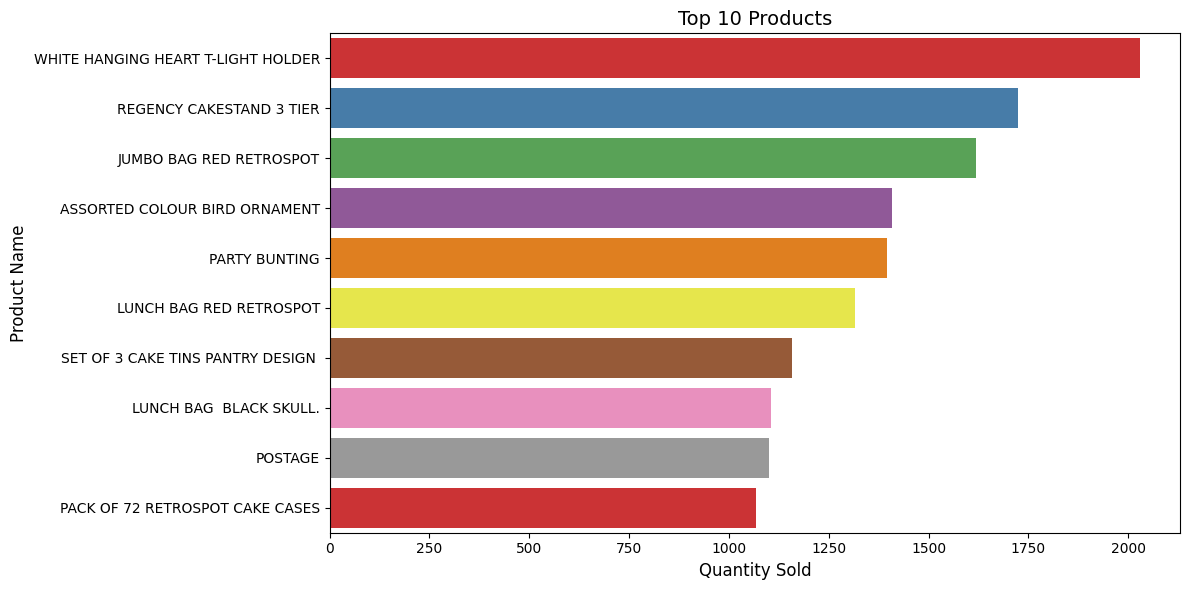

In [32]:
# Correcting column names
top_10_product = retail_df['Description'].value_counts().reset_index()
top_10_product.columns = ['Product_name', 'Count']  # Rename correctly

# Now plot with Set2 palette
plt.figure(figsize=(12,6))
sns.barplot(x='Count', y='Product_name', data=top_10_product.head(10), palette='Set1')
plt.title('Top 10 Products', fontsize=14)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

### **Observations**
* ***WHITE HANGING HEART T-LIGHT HOLDER	is the highest selling product with 2018 units sold***
* ***REGENCY CAKESTAND 3 TIER is the 2nd highest selling product 1723 units sold***

## ***Bottom 10 products sold***

In [33]:
bottom_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(10)
bottom_10_product

,Count,count
3867,SILVER/CRYSTAL DROP EARRINGS W LEAF,1
3868,GREEN DROP EARRINGS W BEAD CLUSTER,1
3869,AMBER GLASS/SHELL/PEARL NECKLACE,1
3870,5 STRAND GLASS NECKLACE AMETHYST,1
3871,RUBY GLASS CLUSTER NECKLACE,1
3872,CLASSIC DIAMANTE NECKLACE JET,1
3873,DIAMANTE NECKLACE BLACK,1
3874,ANT SILVER TURQUOISE BOUDICCA RING,1
3875,PINK CHERRY BLOSSOM CUP & SAUCER,1
3876,BLUE PADDED SOFT MOBILE,1


/tmp/ipython-input-34-3434188411.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Product_name', data=bottom_10_product, palette='Set1')


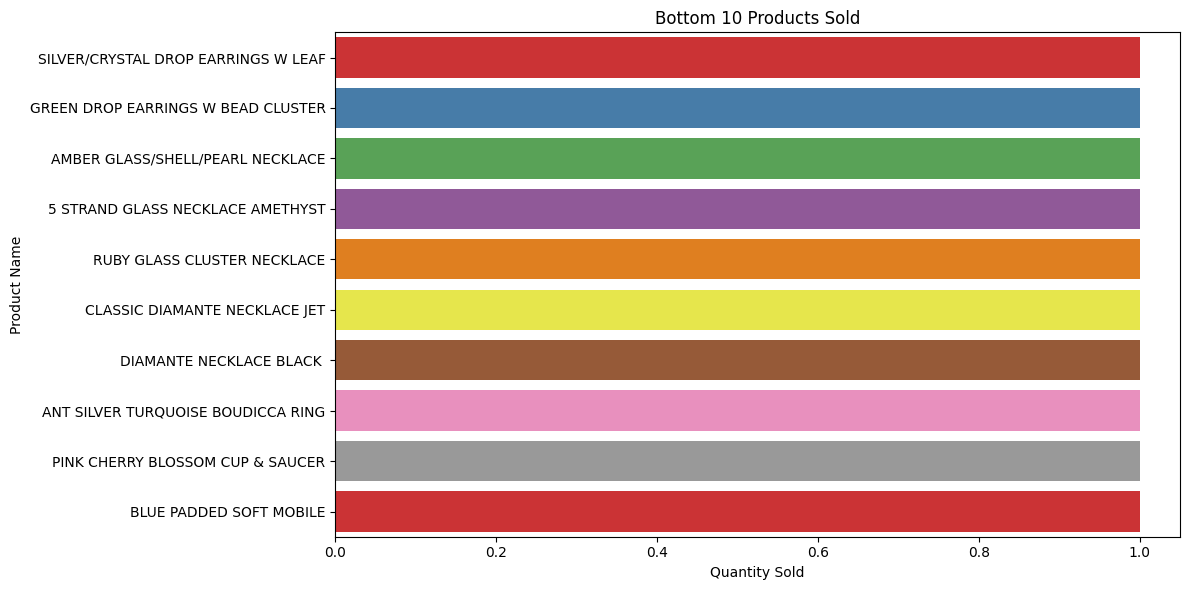

In [34]:
# Get bottom 10 products by count
bottom_10_product = retail_df['Description'].value_counts().reset_index()
bottom_10_product.columns = ['Product_name', 'Count']  # Ensure columns are named correctly
bottom_10_product = bottom_10_product.tail(10)
# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x='Count', y='Product_name', data=bottom_10_product, palette='Set1')
plt.title('Bottom 10 Products Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

## ***Top 10 items in terms of StockCode.***

In [35]:
top_10_StockCodes=retail_df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(10)
top_10_StockCodes

,Count,count
0,85123A,2035
1,22423,1723
2,85099B,1618
3,84879,1408
4,47566,1396
5,20725,1317
6,22720,1159
7,20727,1105
8,POST,1099
9,23203,1098


/tmp/ipython-input-36-2844698777.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='StockCode', data=top_10_StockCodes.head(10), palette='Set1')


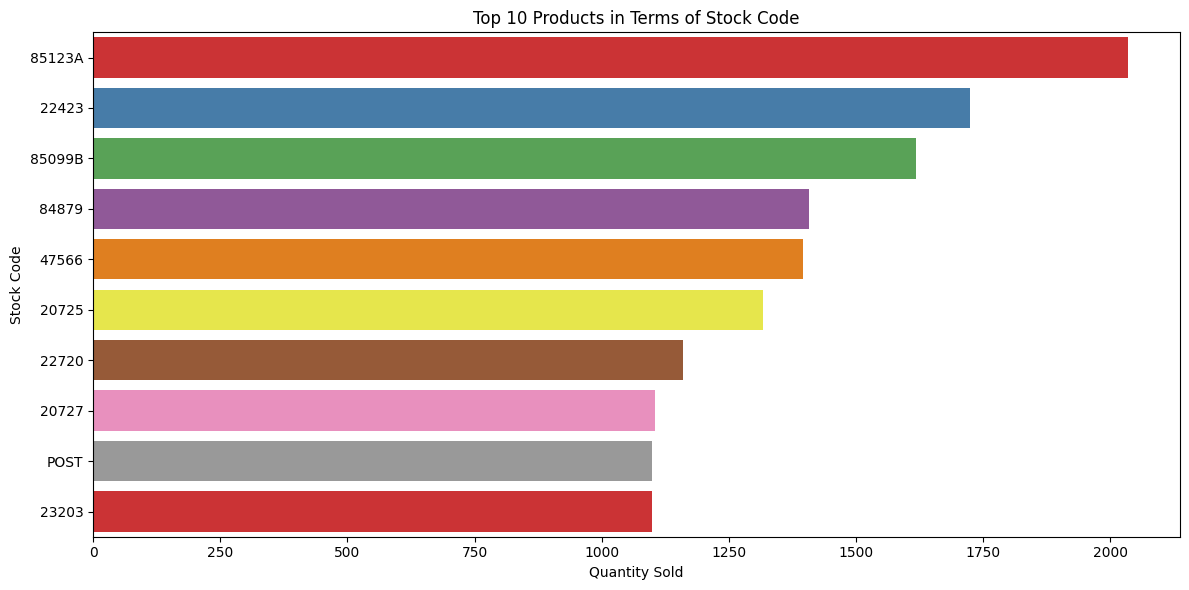

In [36]:
# Get top 10 StockCodes by count
top_10_StockCodes = retail_df['StockCode'].value_counts().reset_index()
top_10_StockCodes.columns = ['StockCode', 'Count']  # Proper column renaming

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Count', y='StockCode', data=top_10_StockCodes.head(10), palette='Set1')
plt.title('Top 10 Products in Terms of Stock Code')
plt.xlabel('Quantity Sold')
plt.ylabel('Stock Code')
plt.tight_layout()
plt.show()

## **Observations**
* ***StockCode-85123A is the highest selling product followed by StockCode-22423 and StockCode-85099B.***

## **Top 10 frequent Customers**

In [37]:
top_10_customers=retail_df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_purchasing_Count'}).head(10)
top_10_customers

,Products_purchasing_Count,count
0,17841.0,7847
1,14911.0,5675
2,14096.0,5111
3,12748.0,4595
4,14606.0,2700
5,15311.0,2379
6,14646.0,2076
7,13089.0,1818
8,13263.0,1677
9,14298.0,1637


/tmp/ipython-input-38-2259591939.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerID', y='Products_purchasing_Count', data=top_10_customers, palette='Set1')


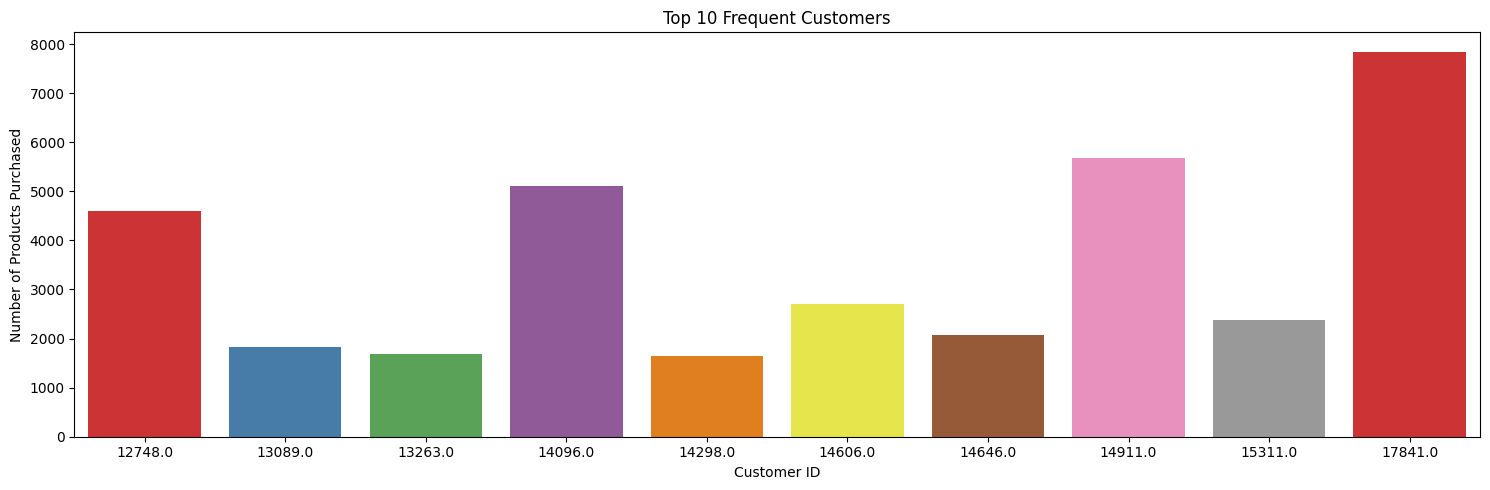

In [38]:
# Assuming you created top_10_customers like this:
top_10_customers = retail_df['CustomerID'].value_counts().reset_index()
top_10_customers.columns = ['CustomerID', 'Products_purchasing_Count']

# Take top 10 customers
top_10_customers = top_10_customers.head(10)

# Plot
plt.figure(figsize=(15,5))
sns.barplot(x='CustomerID', y='Products_purchasing_Count', data=top_10_customers, palette='Set1')
plt.title('Top 10 Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Products Purchased')
plt.tight_layout()
plt.show()

## **Observation**
* ***CustomerID- 17841 had purchased highest number of products***
* ***CustomerID-14911 is the 2nd higest customer who purchased the most products***


## **Top 5 countries where max sale happens**

In [39]:
top_countries=retail_df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'})
top_countries

,Customer_count,count
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1462
9,Australia,1182


/tmp/ipython-input-40-7618061.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Customer_count', data=top_countries.head(5), palette='Set1')


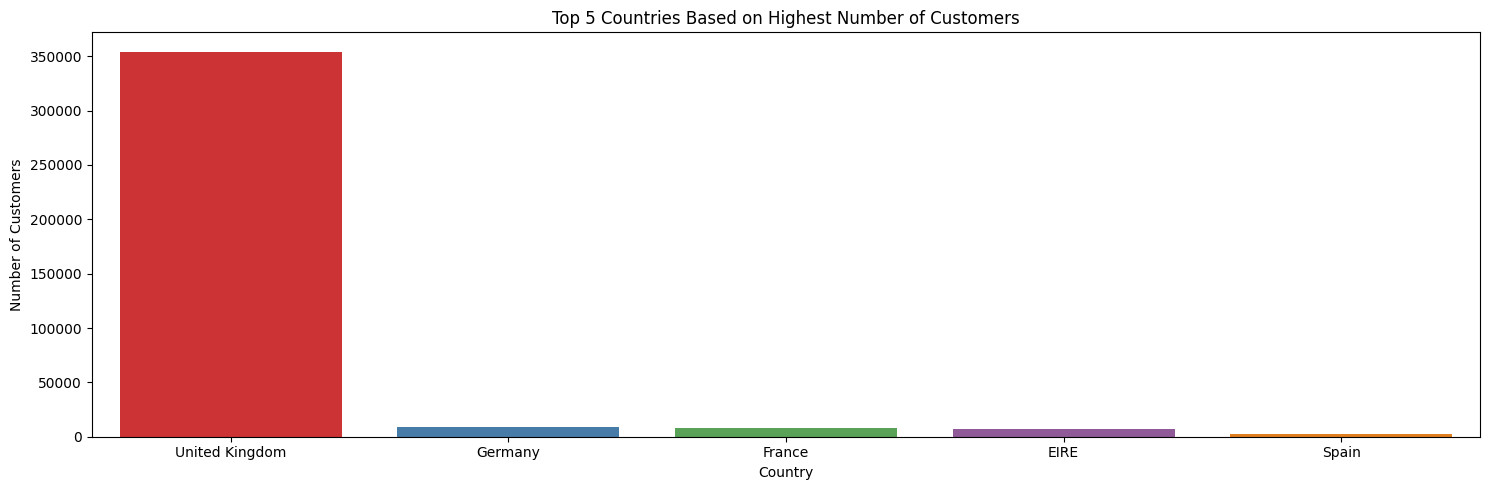

In [40]:
top_countries = retail_df['Country'].value_counts().reset_index()
top_countries.columns = ['Country', 'Customer_count']
plt.figure(figsize=(15,5))
sns.barplot(x='Country', y='Customer_count', data=top_countries.head(5), palette='Set1')
plt.title('Top 5 Countries Based on Highest Number of Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [41]:
print(top_countries.columns)

Index(['Country', 'Customer_count'], dtype='object')


## **Observations**
* ***UK has the highest number of customers***
* ***Germany,France and IreLand has almost similar number of 9040, 8341 and 7236 customers respectively***

/tmp/ipython-input-42-926281330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


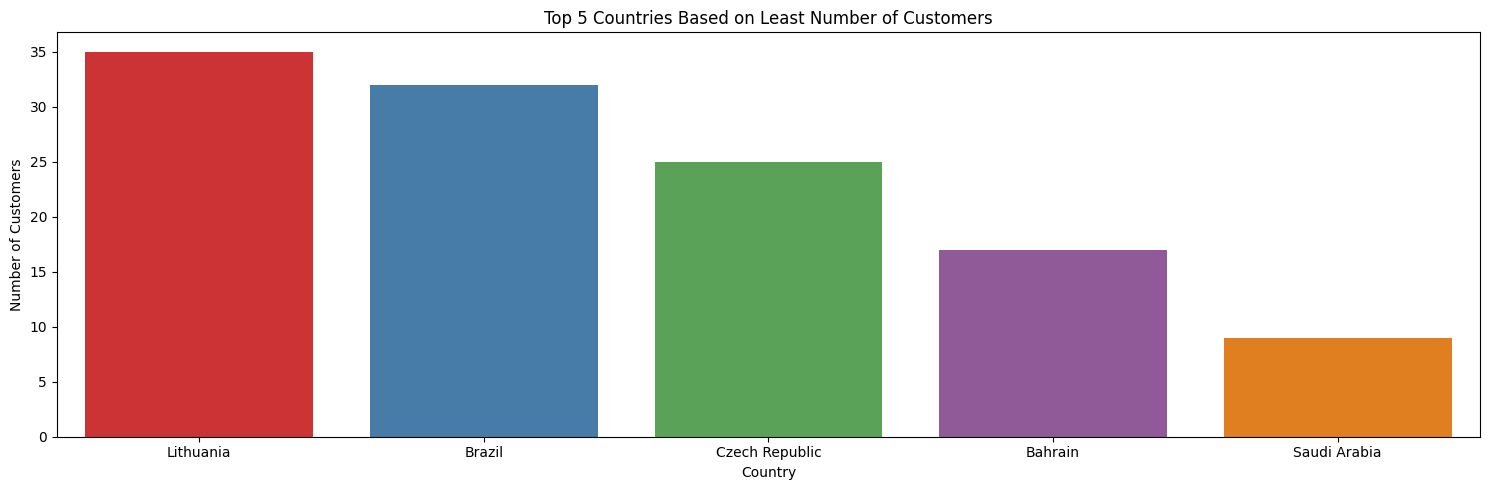

In [42]:
plt.figure(figsize=(15,5))
# Use the .tail(5) inside `data`, and refer to columns by name
sns.barplot(
    x='Country',
    y='Customer_count',
    data=top_countries.tail(5),
    palette='Set1'
)
plt.title('Top 5 Countries Based on Least Number of Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# **Observations**
* ***There are least customers from Saudi Arabia 9***
* ***Bahrain is the 2nd Country having least number of customers with 17 customers***

In [43]:
sales_in_month=retail_df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Sales_count'})
sales_in_month

,Sales_count,count
0,November,54778
1,October,44427
2,September,39613
3,June,34479
4,July,33373
5,May,32572
6,August,31551
7,March,28579
8,April,27273
9,January,27094


/tmp/ipython-input-44-487966884.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Sales_count', data=sales_in_month, palette='Set1')


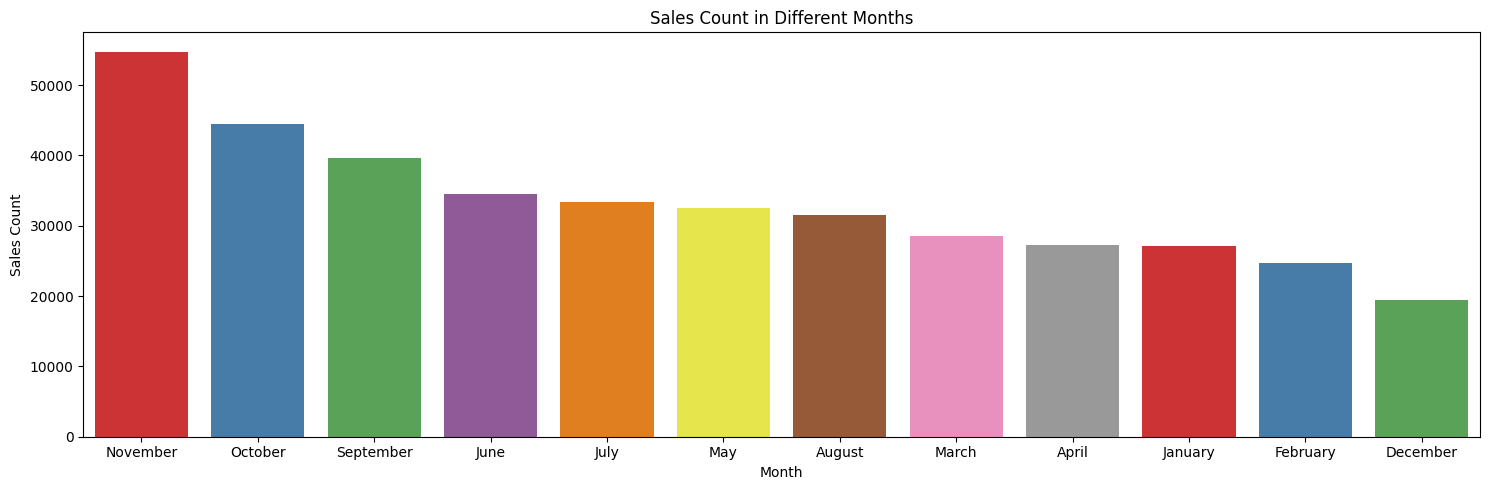

In [44]:
sales_in_month = retail_df['Month'].value_counts().reset_index()
sales_in_month.columns = ['Month', 'Sales_count']
plt.figure(figsize=(15,5))
sns.barplot(x='Month', y='Sales_count', data=sales_in_month, palette='Set1')
plt.title('Sales Count in Different Months')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.tight_layout()
plt.show()

##**Observations**
* ***Most of the sale happened in the month of Novmenber.***
* ***February Month had least sales.***

In [45]:
sales_on_day_basis=retail_df['Day'].value_counts().reset_index().rename(columns={'index':'Day',"Day":'Sale_count'})
sales_on_day_basis

,Sale_count,count
0,Thursday,71454
1,Tuesday,66927
2,Sunday,61254
3,Monday,60306
4,Wednesday,57847
5,Friday,57035
6,Saturday,23061


/tmp/ipython-input-46-687957998.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Sale_count', data=sales_on_day_basis, palette='Set1')


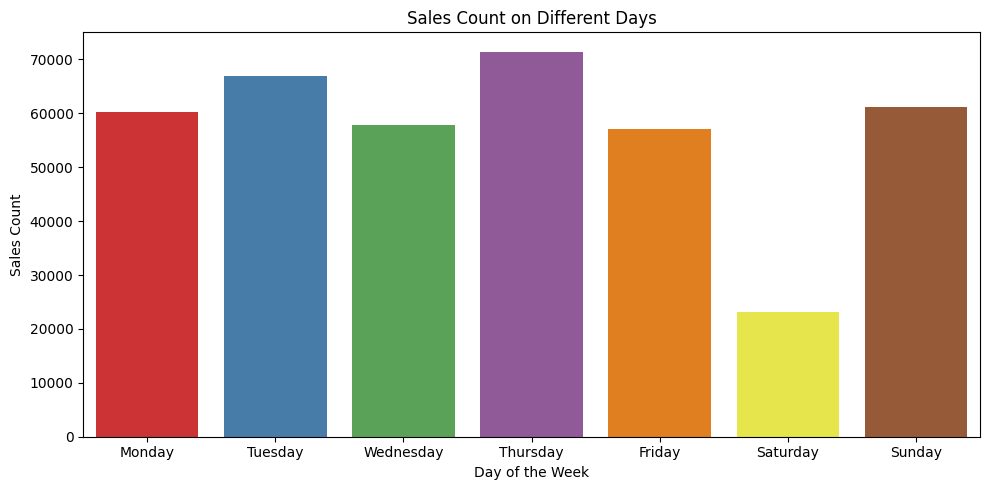

In [46]:
# Count of sales by Day (assuming 'Day' column exists in your retail_df)
sales_on_day_basis = retail_df['Day'].value_counts().reset_index()
sales_on_day_basis.columns = ['Day', 'Sale_count']

# Optional: Sort days in order (Monday to Sunday) if it's string-based
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_on_day_basis['Day'] = pd.Categorical(sales_on_day_basis['Day'], categories=day_order, ordered=True)
sales_on_day_basis = sales_on_day_basis.sort_values('Day')

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(x='Day', y='Sale_count', data=sales_on_day_basis, palette='Set1')
plt.title('Sales Count on Different Days')
plt.xlabel('Day of the Week')
plt.ylabel('Sales Count')
plt.tight_layout()
plt.show()

## **Observations**
* ***Sales On Thursdays is high.***
* ***Sales On Fridays is less***

In [47]:
retail_df['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [48]:
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'


In [49]:
retail_df['Day_time_type']=retail_df['hour'].apply(time)

In [50]:
sales_timing=retail_df['Day_time_type'].value_counts().reset_index().rename(columns={'index':'Day_time_type','Day_time_type':'Sales_count'})
sales_timing

,Sales_count,count
0,Afternoon,272738
1,Morning,118095
2,Evening,7051


/tmp/ipython-input-51-1398833636.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day_time_type', y='Sales_count', data=sales_timing, palette='Set1')


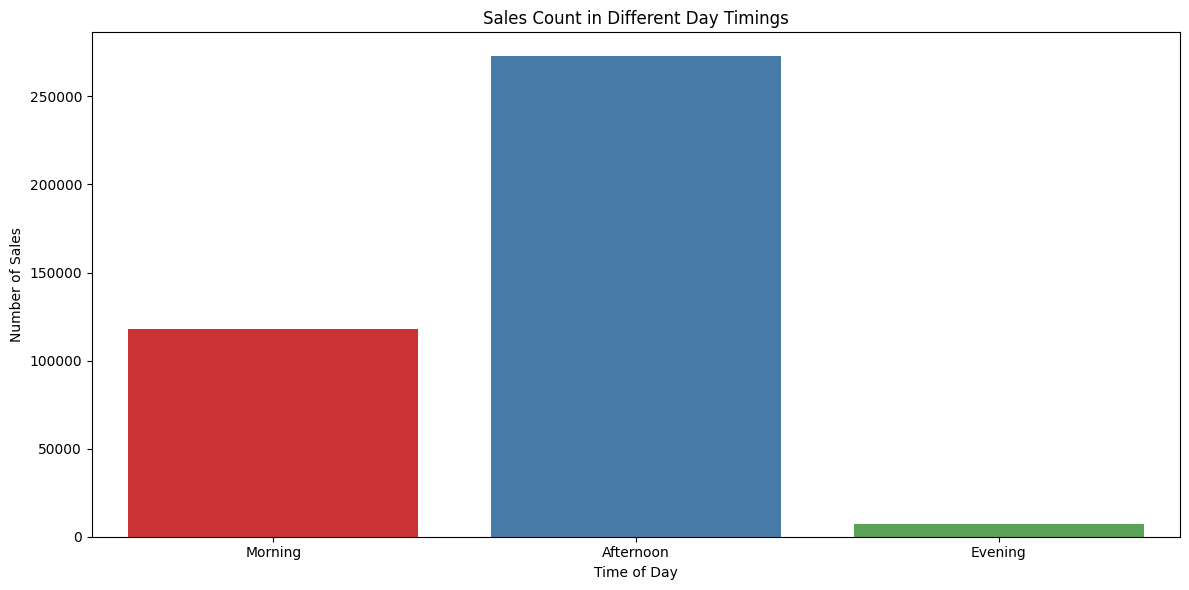

In [51]:
# Function to classify time into Morning, Afternoon, Evening
def time_period(hour):
    if hour in [6, 7, 8, 9, 10, 11]:
        return 'Morning'
    elif hour in [12, 13, 14, 15, 16, 17]:
        return 'Afternoon'
    else:
        return 'Evening'

# Ensure InvoiceDate is datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Extract hour
retail_df['hour'] = retail_df['InvoiceDate'].dt.hour

# Apply the function
retail_df['Day_time_type'] = retail_df['hour'].apply(time_period)

# Count sales by time period
sales_timing = retail_df['Day_time_type'].value_counts().reset_index()
sales_timing.columns = ['Day_time_type', 'Sales_count']  # Rename properly

# Optional: order the categories
order = ['Morning', 'Afternoon', 'Evening']
sales_timing['Day_time_type'] = pd.Categorical(sales_timing['Day_time_type'], categories=order, ordered=True)
sales_timing = sales_timing.sort_values('Day_time_type')

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Day_time_type', y='Sales_count', data=sales_timing, palette='Set1')
plt.title('Sales Count in Different Day Timings')
plt.xlabel('Time of Day')
plt.ylabel('Number of Sales')
plt.tight_layout()
plt.show()

## **Observations**

* ***Most of the sales happens in the afternoon.***
* ***Least sales happens in the evening.***

In [52]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount', 'Day_time_type'],
      dtype='object')

In [53]:
retail_df.shape

(397884, 17)

In [54]:
avg_amount=retail_df.groupby('CustomerID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False)

In [55]:
avg_amount

,CustomerID,Avg_amount_per_customer
0,12346.0,77183.600000
3008,16446.0,56157.500000
2011,15098.0,13305.500000
2502,15749.0,4453.430000
2087,15195.0,3861.000000
...,...,...
3590,17254.0,2.432500
697,13271.0,2.264375
990,13684.0,2.241000
3995,17816.0,2.150588


/tmp/ipython-input-56-1368259589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


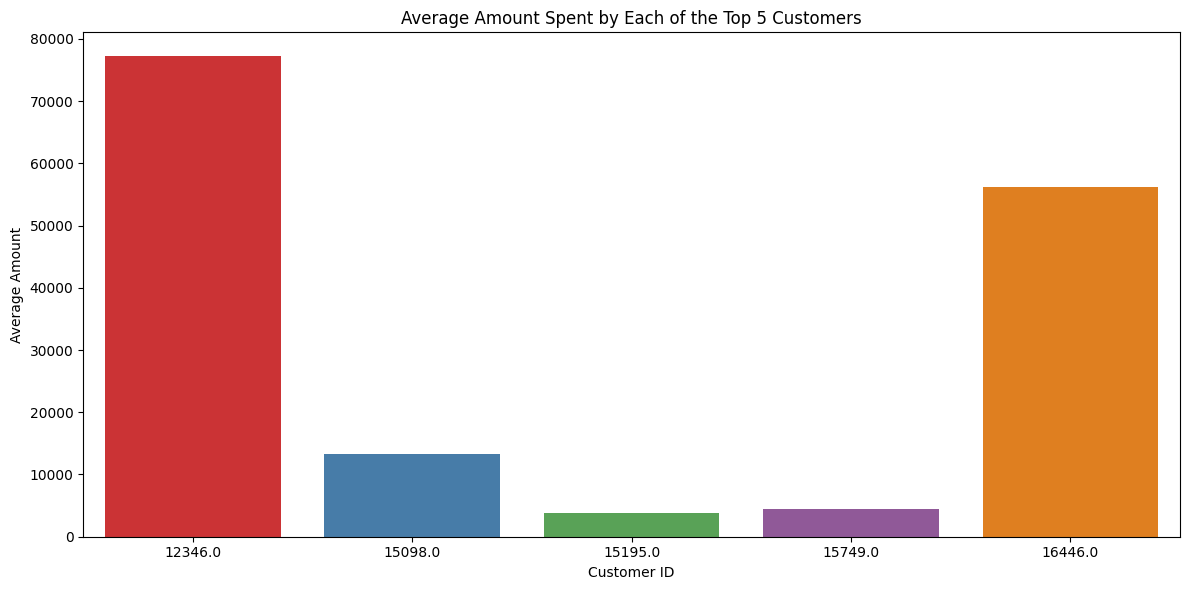

In [56]:
# Plot: Average amount spent by each of the top 5 customers
plt.figure(figsize=(12,6))
sns.barplot(
    x=avg_amount['CustomerID'].head(5),
    y=avg_amount['Avg_amount_per_customer'].head(5),
    palette='Set1'
)
plt.title('Average Amount Spent by Each of the Top 5 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Average Amount')
plt.tight_layout()
plt.show()

### **Observation**
* ***77183 (Dollars)is the highest average amount spent by the CustomerID-12346***
* ***56157 (Dollars) is the 2nd  highest average amount spent by the CustomerID-16446***

#     **Model Building**

# **RFM Model Analysis:**

#**What is RFM?**

* ***RFM is a method used to analyze customer value. RFM stands for RECENCY, Frequency, and Monetary.***

* ***RECENCY: How recently did the customer visit our website or how recently did a customer purchase?***

* ***Frequency: How often do they visit or how often do they purchase?***

* ***Monetary: How much revenue we get from their visit or how much do they spend when they purchase?***

# **Why it is Needed?**
***RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors RECENCY, Frequency, and Monetary.***

***The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.***

In [57]:
rfm_dataframe=retail_df.copy()

In [58]:
rfm_dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount,Day_time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1,12,8,26,January,Tuesday,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,January,Tuesday,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1,12,8,26,January,Tuesday,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,January,Tuesday,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,26,January,Tuesday,20.34,Morning


In [59]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_dataframe = retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_dataframe['InvoiceDate'] = rfm_dataframe['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_dataframe.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_dataframe.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,39,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [60]:
# Descriptive Stats= Recency
rfm_dataframe.Recency.describe()

,Recency
count,4338.000000
mean,104.502766
std,115.089552
min,-1.000000
25%,21.000000
50%,60.000000
75%,160.750000
max,696.000000


/tmp/ipython-input-61-2435964456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=rfm_dataframe['Recency'])


Text(0.5, 1.0, 'Distribution of Recency')

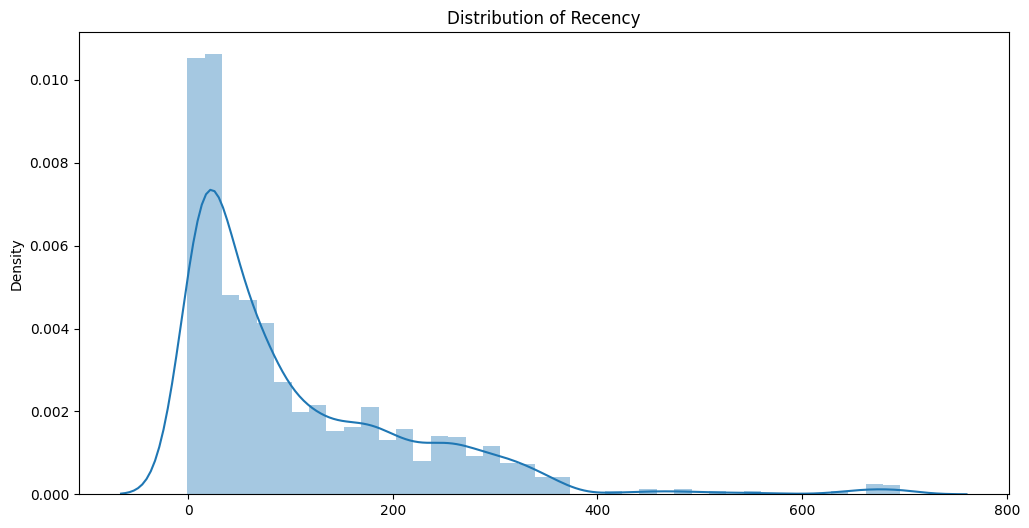

In [61]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Recency'])
plt.title('Distribution of Recency')

***Distribution of Recency is right skewed.***

In [62]:
# Descriptive Stats= Frequency
rfm_dataframe['Frequency'].describe()

,Frequency
count,4338.000000
mean,91.720609
std,228.785094
min,1.000000
25%,17.000000
50%,41.000000
75%,100.000000
max,7847.000000


/tmp/ipython-input-63-390788589.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=rfm_dataframe['Frequency'])


Text(0.5, 1.0, 'Distribution of Frequency')

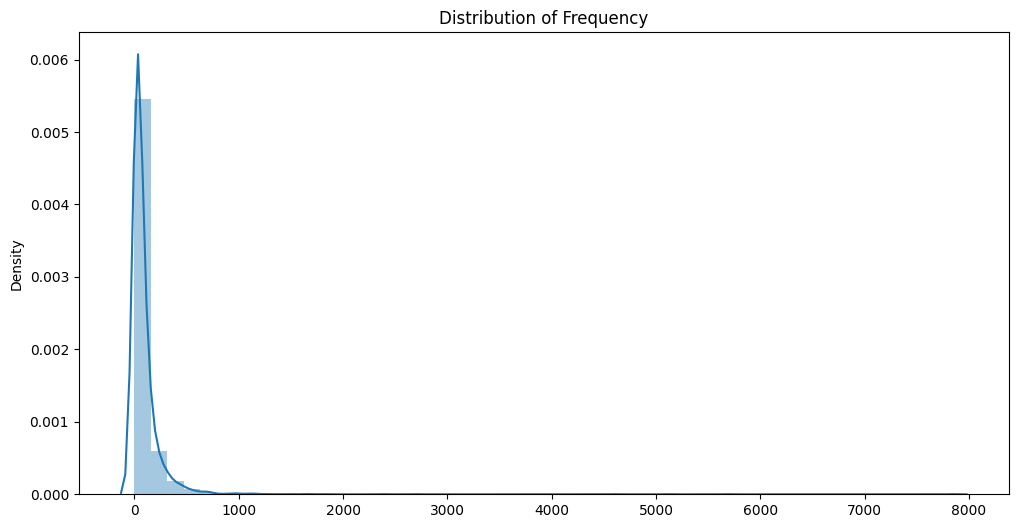

In [63]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Frequency'])
plt.title('Distribution of Frequency')

***Distribution of Frequency is highly right skewed.***

In [64]:
# Descriptive Stats= Monetary
rfm_dataframe['Monetary'].describe()

,Monetary
count,4338.000000
mean,2054.266460
std,8989.230441
min,3.750000
25%,307.415000
50%,674.485000
75%,1661.740000
max,280206.020000


/tmp/ipython-input-65-501407456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=rfm_dataframe['Monetary'])


Text(0.5, 1.0, 'Distribution of Monetary')

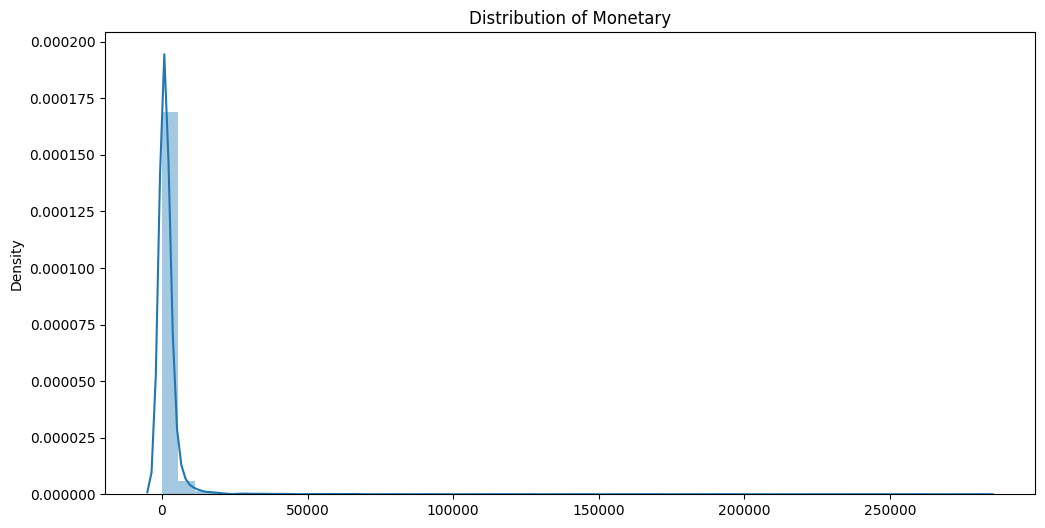

In [65]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Monetary'])
plt.title('Distribution of Monetary')

***Distribution of Monetary is highly right skewed.***

In [66]:
# Split the data into four segment using Quantile
quantile = rfm_dataframe.quantile(q = [0.25,0.50,0.75])

In [67]:
quantile = quantile.to_dict()

In [68]:
quantile

{'Recency': {0.25: 21.0, 0.5: 60.0, 0.75: 160.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [69]:
#Converting quantiles to a dictionary, easier to use.
#quantiles = quantiles.to_dict()
#Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company



def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [70]:
## To understand the above function's code here is an example
# if 18 <= quantile['Recency'][0.25]:
#   print(1)
# else:
#   print('Great')

In [71]:
# Calculating and adding R,F and M segments values columns in the existing dataset to show R,F,M segment values

rfm_dataframe["R"] = rfm_dataframe['Recency'].apply(RScoring,args=('Recency',quantile,))
rfm_dataframe["F"] = rfm_dataframe['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
rfm_dataframe["M"] = rfm_dataframe['Monetary'].apply(FnMScoring,args=('Monetary',quantile,))
rfm_dataframe.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,39,182,4310.00,2,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,1,2,1
12350.0,310,17,334.40,4,4,3


In [72]:
# Add a new column to combine RFM score
rfm_dataframe['RFM_Group'] = rfm_dataframe.R.map(str)+rfm_dataframe.F.map(str)+rfm_dataframe.M.map(str)

In [73]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_dataframe['RFM_Score'] = rfm_dataframe[['R', 'F', 'M']].sum(axis = 1)
rfm_dataframe.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,39,182,4310.00,2,1,1,211,4
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,1,2,1,121,4
12350.0,310,17,334.40,4,4,3,443,11


In [74]:
rfm_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
 3   R          4338 non-null   int64  
 4   F          4338 non-null   int64  
 5   M          4338 non-null   int64  
 6   RFM_Group  4338 non-null   object 
 7   RFM_Score  4338 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.0+ KB


In [75]:
rfm_dataframe['RFM_Score'].unique()

array([ 9,  4,  7, 11,  6, 12,  8, 10,  5,  3])

In [76]:
# Assign Loyelty Level to each customer
Loyalty_Level = ['Platinaum','Gold','Silver','Bronz']

Score_cut = pd.qcut(rfm_dataframe['RFM_Score'],q = 4,labels=Loyalty_Level)
rfm_dataframe['RFM_Loyalty_Level'] = Score_cut.values
rfm_dataframe.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,39,182,4310.00,2,1,1,211,4,Platinaum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,1,2,1,121,4,Platinaum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronz


In [77]:
rfm_dataframe['RFM_Score'].unique()

array([ 9,  4,  7, 11,  6, 12,  8, 10,  5,  3])

In [78]:
# Validate the data For RFM group = 111
rfm_dataframe[rfm_dataframe['RFM_Group'] == '111'].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,14646.0,1,2076,280206.02,1,1,1,111,3,Platinaum
1,18102.0,11,431,259657.30,1,1,1,111,3,Platinaum
2,17450.0,2,337,194550.79,1,1,1,111,3,Platinaum
3,14911.0,-1,5675,143825.06,1,1,1,111,3,Platinaum
4,14156.0,-1,1400,117379.63,1,1,1,111,3,Platinaum
5,17511.0,5,963,91062.38,1,1,1,111,3,Platinaum
6,16684.0,11,277,66653.56,1,1,1,111,3,Platinaum
7,14096.0,11,5111,65164.79,1,1,1,111,3,Platinaum
8,15311.0,-1,2379,60767.90,1,1,1,111,3,Platinaum
9,13089.0,5,1818,58825.83,1,1,1,111,3,Platinaum


In [79]:
rfm_dataframe.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver
12347.0,39,182,4310.00,2,1,1,211,4,Platinaum
12348.0,75,31,1797.24,3,3,1,331,7,Gold
12349.0,18,73,1757.55,1,2,1,121,4,Platinaum
12350.0,310,17,334.40,4,4,3,443,11,Bronz


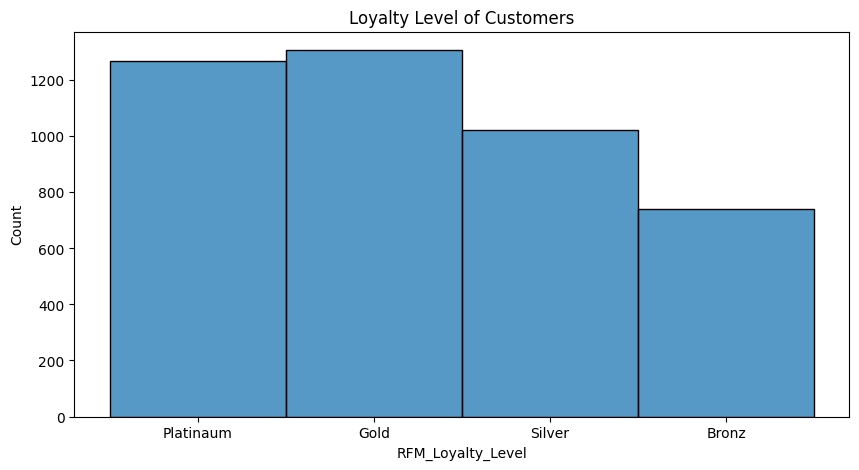

In [80]:
# Plot the loyelty level
plt.figure(figsize=(10,5))
sns.histplot(rfm_dataframe['RFM_Loyalty_Level'])
plt.title('Loyalty Level of Customers')
plt.show()

In [81]:
#Folowing table contains our target peoples
rfm_dataframe[rfm_dataframe['RFM_Loyalty_Level'] == 'Platinaum'].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,14646.0,1,2076,280206.02,1,1,1,111,3,Platinaum
1,18102.0,11,431,259657.30,1,1,1,111,3,Platinaum
2,17450.0,2,337,194550.79,1,1,1,111,3,Platinaum
3,14911.0,-1,5675,143825.06,1,1,1,111,3,Platinaum
4,12415.0,24,714,124914.53,2,1,1,211,4,Platinaum
5,14156.0,-1,1400,117379.63,1,1,1,111,3,Platinaum
6,17511.0,5,963,91062.38,1,1,1,111,3,Platinaum
7,16029.0,29,242,81024.84,2,1,1,211,4,Platinaum
8,16684.0,11,277,66653.56,1,1,1,111,3,Platinaum
9,14096.0,11,5111,65164.79,1,1,1,111,3,Platinaum


In [82]:
segmentation_based_on_RFM=rfm_dataframe[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]

In [83]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

/tmp/ipython-input-83-892692514.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({


Recency            Frequency               Monetary  \
                         mean min  max        mean min   max         mean   
RFM_Loyalty_Level                                                           
Platinaum           25.070245  -1  159  227.565114  20  7847  5224.438398   
Gold                73.514920  -1  665   58.094109   1   378  1251.032404   
Silver             143.137830  -1  696   24.811339   1    99   501.201986   
Bronz              241.639676  62  696   11.130904   1    41   194.622767   

                                            
                      min        max count  
RFM_Loyalty_Level                           
Platinaum          360.93  280206.02  1267  
Gold               112.75  168472.50  1307  
Silver               6.90   77183.60  1023  
Bronz                3.75     656.68   741

In [84]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_dataframe['Recency'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Recency]
rfm_dataframe['Monetary'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Monetary]

In [85]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_rfm_df = rfm_dataframe[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

## ***Now let's Visualize the Distribution of Recency,Frequency and Monetary.***

/tmp/ipython-input-86-1775348594.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=Log_rfm_df['Recency'])


Text(0.5, 1.0, 'Distribution of Recency')

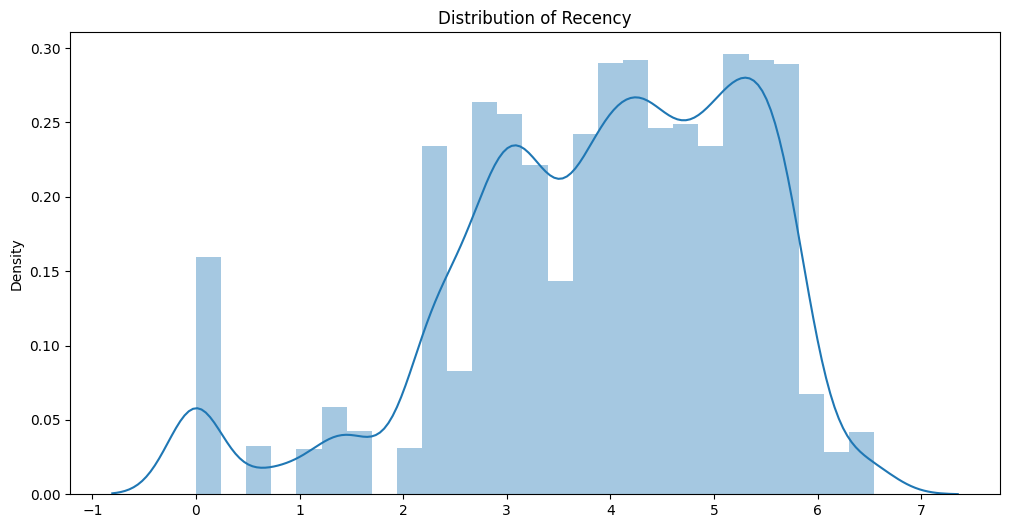

In [86]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Recency'])
plt.title('Distribution of Recency')

/tmp/ipython-input-87-4241107088.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=Log_rfm_df['Frequency'])


Text(0.5, 1.0, 'Distribution of Frequency')

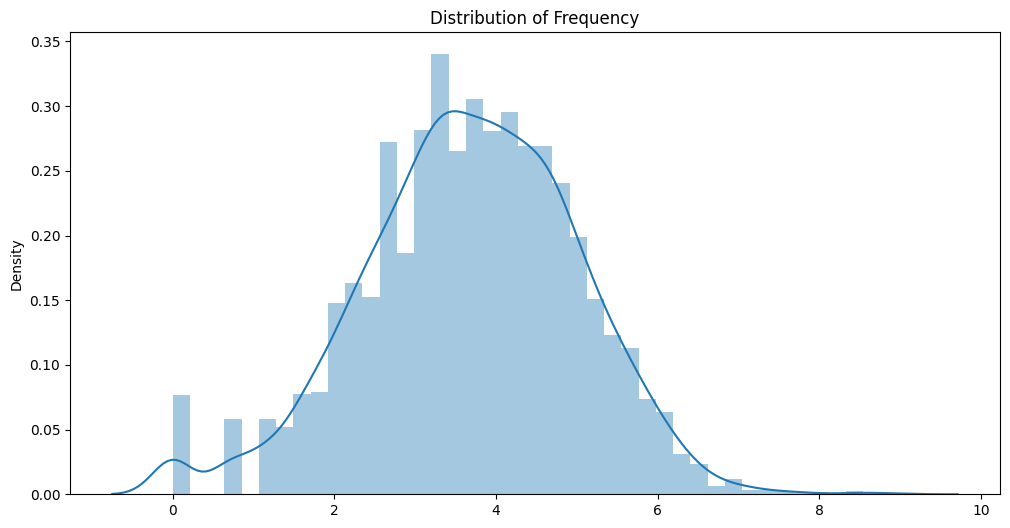

In [87]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Frequency'])
plt.title('Distribution of Frequency')

/tmp/ipython-input-88-252944564.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=Log_rfm_df['Monetary'])


Text(0.5, 1.0, 'Distribution of Monetary')

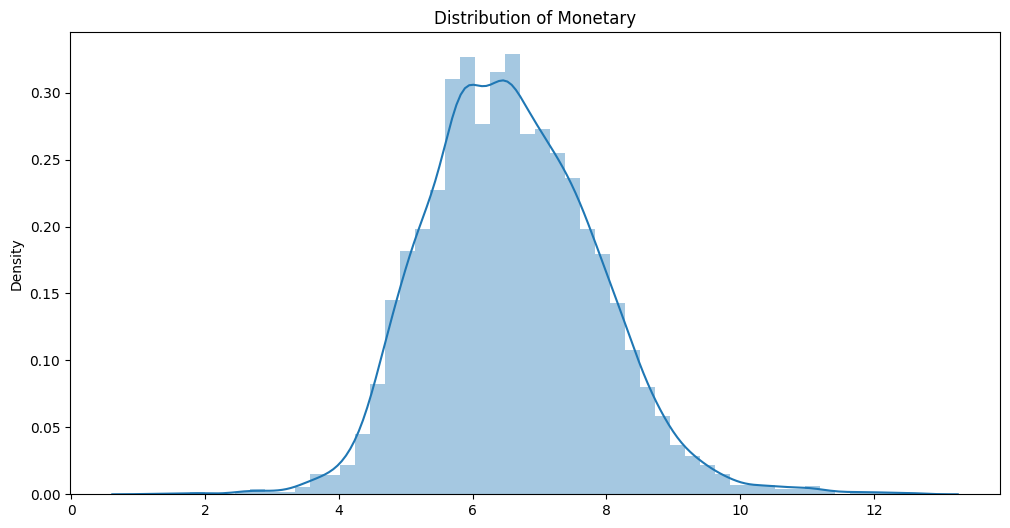

In [88]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Monetary'])
plt.title('Distribution of Monetary')

## **Observations**

*   Earlier the distributions of Recency, Frequency and Monetary columns were positively skewed but after applying log transformation, the distributions appear to be symmetrical and normally distributed.
*   It will be more suitable to use the transformed features for better visualisation of clusters.

In [89]:

rfm_dataframe['Recency_log'] = rfm_dataframe['Recency'].apply(math.log)
rfm_dataframe['Frequency_log'] = rfm_dataframe['Frequency'].apply(math.log)
rfm_dataframe['Monetary_log'] = rfm_dataframe['Monetary'].apply(math.log)

In [90]:
rfm_dataframe

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942
12347.0,39,182,4310.00,2,1,1,211,4,Platinaum,3.663562,5.204007,8.368693
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007
12349.0,18,73,1757.55,1,2,1,121,4,Platinaum,2.890372,4.290459,7.471676
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,159,10,180.60,3,4,4,344,11,Bronz,5.068904,2.302585,5.196285
18281.0,3,7,80.82,1,4,4,144,9,Silver,1.098612,1.945910,4.392224
18282.0,215,12,178.05,4,4,4,444,12,Bronz,5.370638,2.484907,5.182064


# **1) KMeans Clustering:**

In [91]:
#Importing Libraries

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.

# ***Recency and Monetary.***

##***A)  Applying Elbow Method on Recency and Monetary.***

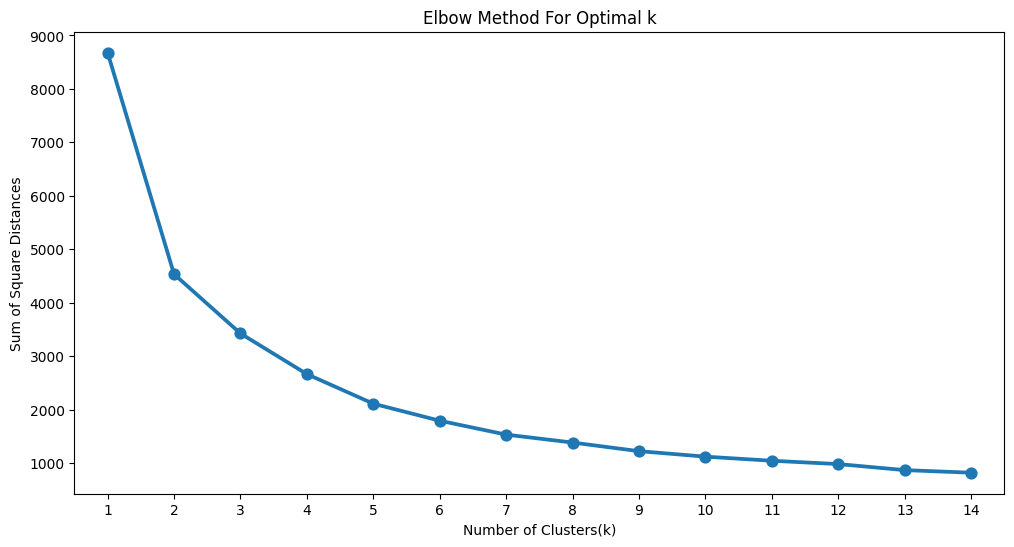

In [92]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()



## **Observations**
## Here we can see that Optimal value for cluster came out to be 2.

Elbow Visulaizer also giving cluster=2

##**Silhouette Score** ***(Validating Above optimal cluster value(i.e optimal_cluster=2)***

In [93]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42014661508058776
For n_clusters = 3, silhouette score is 0.3445502362506351
For n_clusters = 4, silhouette score is 0.35680614003537875
For n_clusters = 5, silhouette score is 0.3642523786388671
For n_clusters = 6, silhouette score is 0.35573618905736737
For n_clusters = 7, silhouette score is 0.3460526093679232
For n_clusters = 8, silhouette score is 0.3454381645175733
For n_clusters = 9, silhouette score is 0.34962393087608734
For n_clusters = 10, silhouette score is 0.33721363566372364
For n_clusters = 11, silhouette score is 0.3367992725333409
For n_clusters = 12, silhouette score is 0.3384725523664411
For n_clusters = 13, silhouette score is 0.3360184980330022
For n_clusters = 14, silhouette score is 0.33401923187644794
For n_clusters = 15, silhouette score is 0.32843347854333754


***Here we can see the for n_cluster=2 silhouette score is better as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)***

###**So giving n_clusters=2 on Kmeans Model.**

In [94]:
# applying Kmeans_clustering algorithm
kmeans_rec_mon = KMeans(n_clusters=2)
kmeans_rec_mon.fit(X)
y_kmeans= kmeans_rec_mon.predict(X)

In [95]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_rec_mon'] = kmeans_rec_mon.labels_
rfm_dataframe.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon
CustomerID,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942,0
12347.0,39,182,4310.00,2,1,1,211,4,Platinaum,3.663562,5.204007,8.368693,0
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,0
12349.0,18,73,1757.55,1,2,1,121,4,Platinaum,2.890372,4.290459,7.471676,0
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338,1
12352.0,72,85,2506.04,3,2,1,321,6,Gold,4.276666,4.442651,7.826459,0
12353.0,204,4,89.00,4,4,4,444,12,Bronz,5.318120,1.386294,4.488636,1
12354.0,232,58,1079.40,4,2,2,422,8,Gold,5.446737,4.060443,6.984161,1
12355.0,95,13,459.40,3,4,3,343,10,Silver,4.553877,2.564949,6.129921,1


In [96]:
# Centers of the clusters(coordinates)
centers = kmeans_rec_mon.cluster_centers_
centers

array([[-0.80513298,  0.81455587],
       [ 0.5858136 , -0.59266968]])

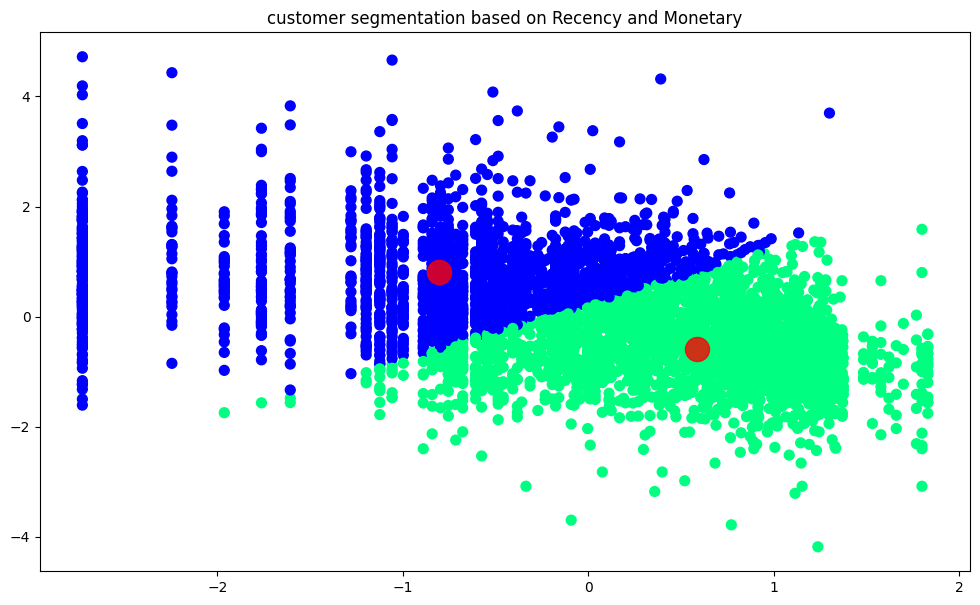

In [97]:
# ploting visualizing the clusters
plt.figure(figsize=(12,7))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_rec_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

# ***Frequency and Monetary***

# **1) KMeans Clustering**

Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.

##***A)  Applying Elbow Method on Frequency and Monetary.***

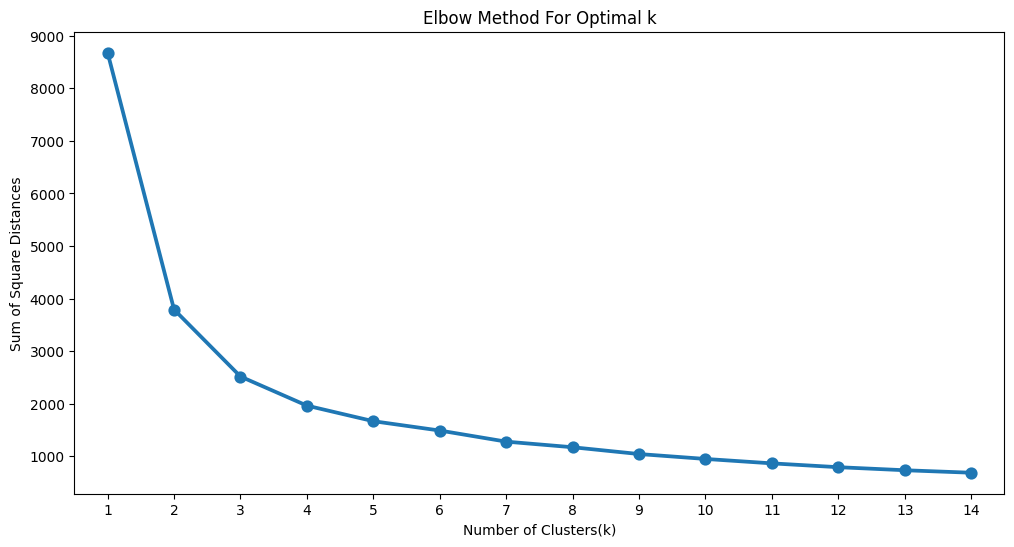

In [98]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### **Here we can see that Optimal value for cluster came out to be 2.**

Elbow Visulaizer also giving cluster=2

##**Silhouette Score** ***(Validating Above optimal cluster value(i.e optimal_cluster=2)***

In [99]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.47881357554614307
For n_clusters = 3, silhouette score is 0.40764120562174455
For n_clusters = 4, silhouette score is 0.37205487483957167
For n_clusters = 5, silhouette score is 0.34513267948836435
For n_clusters = 6, silhouette score is 0.3189148091164922
For n_clusters = 7, silhouette score is 0.3070069463803801
For n_clusters = 8, silhouette score is 0.324639677211026
For n_clusters = 9, silhouette score is 0.34221876650822664
For n_clusters = 10, silhouette score is 0.3521641722004679
For n_clusters = 11, silhouette score is 0.3433703723648108
For n_clusters = 12, silhouette score is 0.35185753995843805
For n_clusters = 13, silhouette score is 0.3541690985967909
For n_clusters = 14, silhouette score is 0.3583065023340183
For n_clusters = 15, silhouette score is 0.35700638567065957


***Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)***

In [100]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon = KMeans(n_clusters=2)
kmeans_freq_mon.fit(X)
y_kmeans= kmeans_freq_mon.predict(X)

In [101]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon'] = kmeans_freq_mon.labels_
rfm_dataframe.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon,Cluster_based_on_freq_mon
CustomerID,,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942,0,0
12347.0,39,182,4310.00,2,1,1,211,4,Platinaum,3.663562,5.204007,8.368693,0,0
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,0,0
12349.0,18,73,1757.55,1,2,1,121,4,Platinaum,2.890372,4.290459,7.471676,0,0
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338,1,1
12352.0,72,85,2506.04,3,2,1,321,6,Gold,4.276666,4.442651,7.826459,0,0
12353.0,204,4,89.00,4,4,4,444,12,Bronz,5.318120,1.386294,4.488636,1,1
12354.0,232,58,1079.40,4,2,2,422,8,Gold,5.446737,4.060443,6.984161,1,0
12355.0,95,13,459.40,3,4,3,343,10,Silver,4.553877,2.564949,6.129921,1,1


In [102]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon.cluster_centers_
centers

array([[ 0.79949056,  0.81019422],
       [-0.69477487, -0.70407658]])

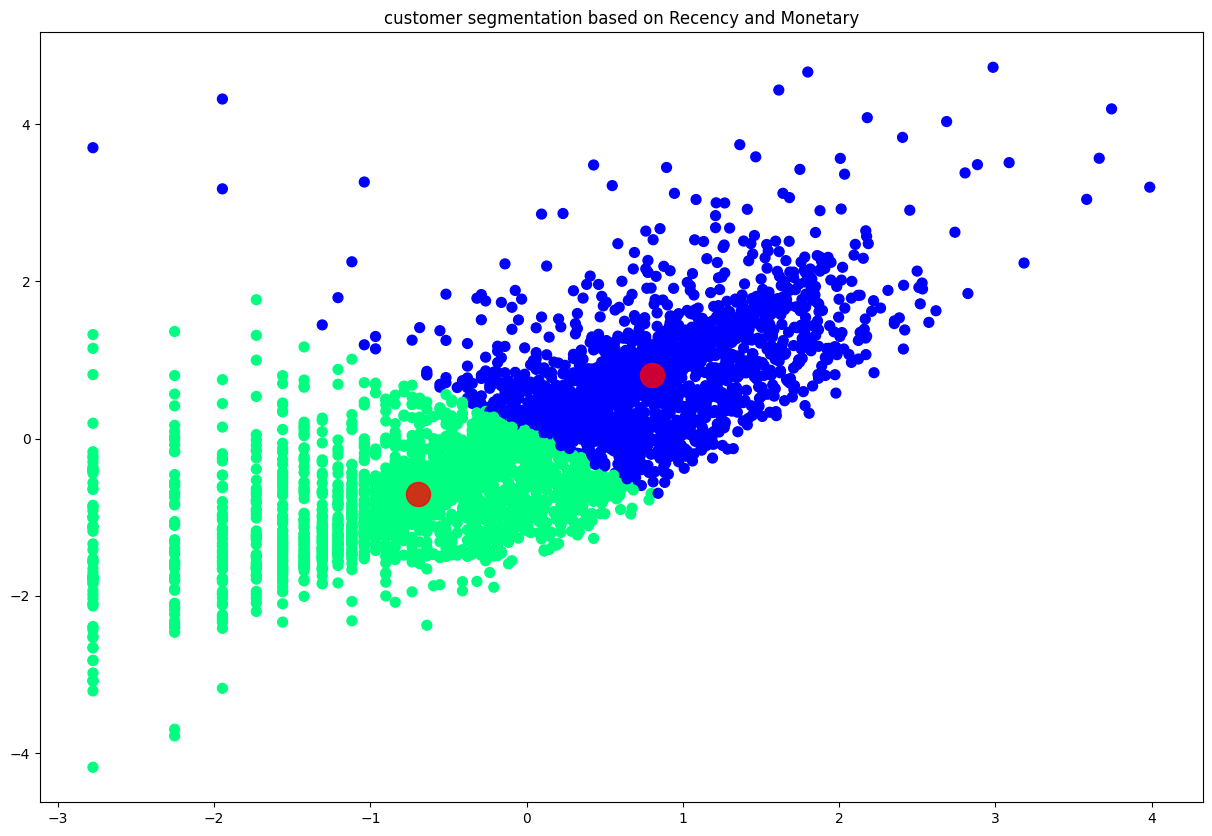

In [103]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

# **Recency,Frequency and Monetary**

# **1) KMeans Clustering**

***Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.***

#***A) Applying Elbow Method on Recency, Frequency and Monetary.***

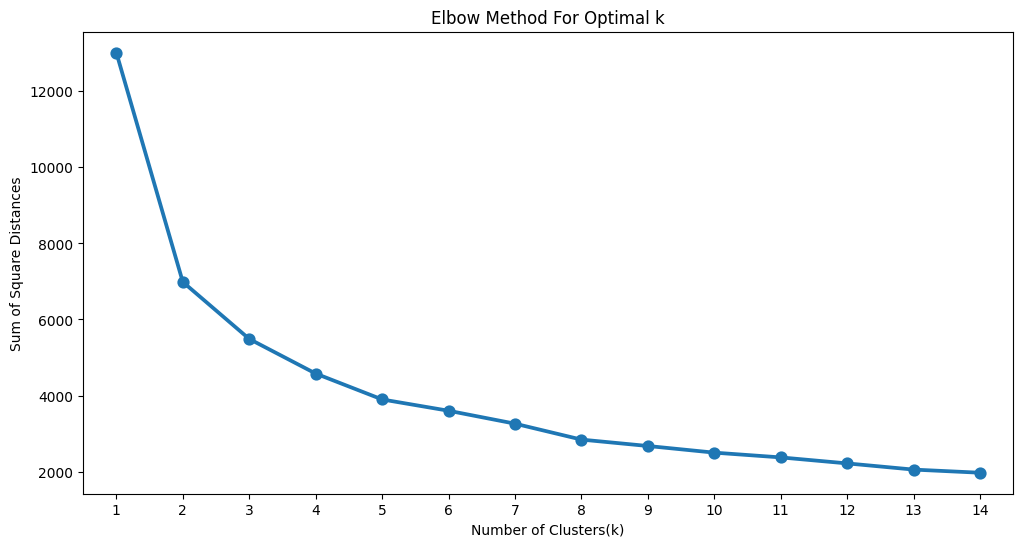

In [104]:
# taking Recency_log, Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# **Here we can see that Optimal value for cluster came out to be 2.**

* Elbow Visulaizer also giving cluster=2

# **Silhouette Score (Validating Above optimal cluster value(i.e optimal_cluster=2)**

In [105]:
# taking Recency_log,Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3944890701218069
For n_clusters = 3, silhouette score is 0.29252486459461546
For n_clusters = 4, silhouette score is 0.25251537217869036
For n_clusters = 5, silhouette score is 0.27591285487608974
For n_clusters = 6, silhouette score is 0.28459641059108287
For n_clusters = 7, silhouette score is 0.2757917514855891
For n_clusters = 8, silhouette score is 0.26489912189057613
For n_clusters = 9, silhouette score is 0.2605058968999076
For n_clusters = 10, silhouette score is 0.25337438493008985
For n_clusters = 11, silhouette score is 0.24333570781830027
For n_clusters = 12, silhouette score is 0.2551522826093102
For n_clusters = 13, silhouette score is 0.26045308825920144
For n_clusters = 14, silhouette score is 0.2605564586962575
For n_clusters = 15, silhouette score is 0.24912117791866917


***Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)***

In [106]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon_rec = KMeans(n_clusters=2)
kmeans_freq_mon_rec.fit(X)
y_kmeans= kmeans_freq_mon_rec.predict(X)

In [107]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon_rec'] = kmeans_freq_mon_rec.labels_
print(rfm_dataframe.head(10))

            Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0          39        182   4310.00  2  1  1       211          4   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  1  2  1       121          4   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          72         85   2506.04  3  2  1       321          6   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  2  2       422          8   
12355.0          95         13    459.40  3  4  3       343         10   
12356.0          22         59   2811.43  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                           

In [108]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon_rec.cluster_centers_
centers

array([[-0.66593392,  0.79194903,  0.80532657],
       [ 0.53824338, -0.64009553, -0.65090797]])

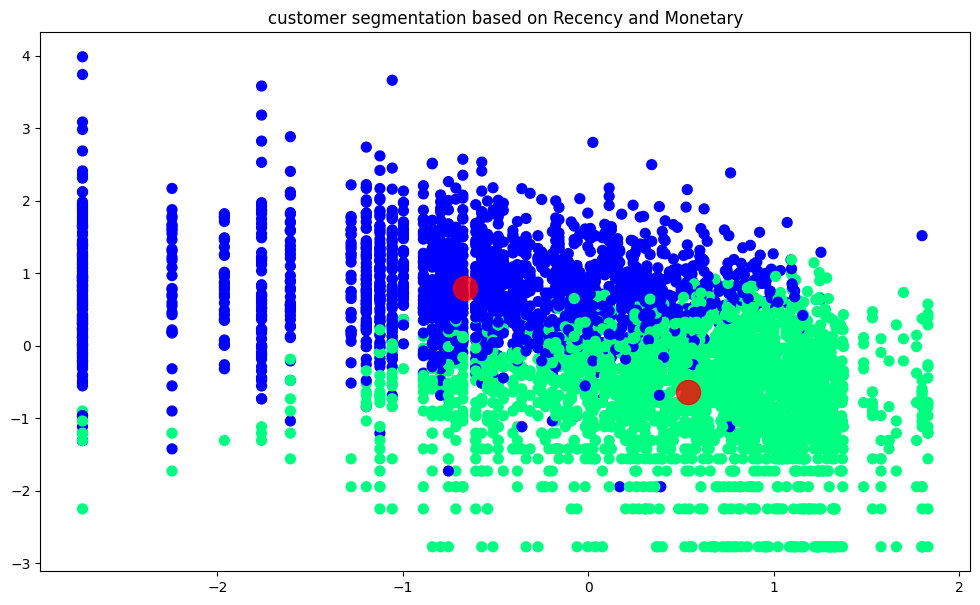

In [109]:
# ploting visualizing the clusters
plt.figure(figsize=(12,7))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon_rec.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

# **Hierarchical Clustering**

In [110]:
import scipy.cluster.hierarchy as sch

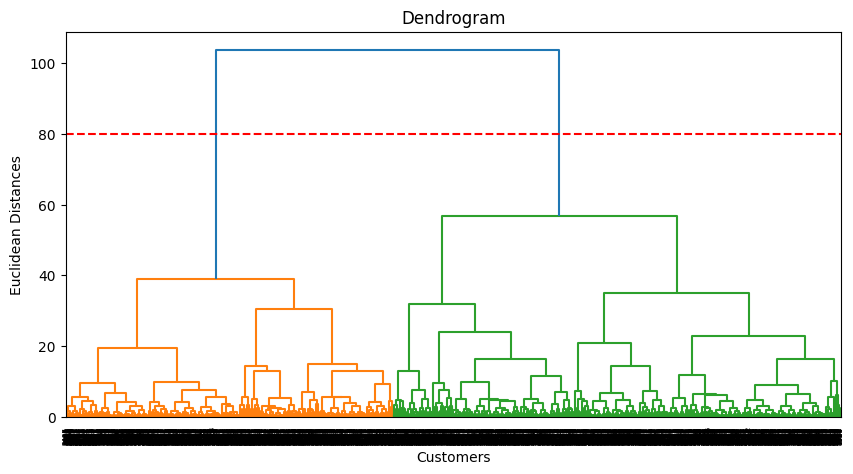

In [111]:
plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

### <b> The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. </b>

### No. of Cluster  = 2

In [112]:
from sklearn.cluster import AgglomerativeClustering

# Use `metric` instead of `affinity`
h_clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = h_clustering.fit_predict(X)


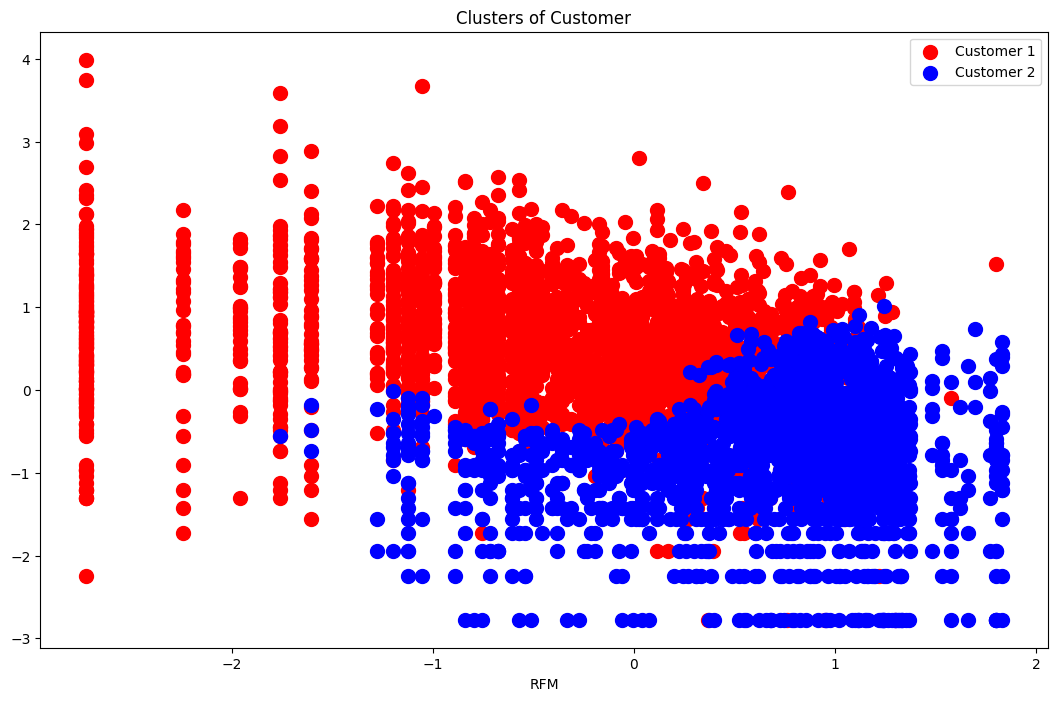

In [113]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.legend()
plt.show()

In [114]:
rfm_dataframe.head(1)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon,Cluster_based_on_freq_mon,Cluster_based_on_freq_mon_rec
CustomerID,,,,,,,,,,,,,,,
12346.0,325,1,77183.6,4,4,1,441,9,Silver,5.783825,0.0,11.253942,0,0,1


In [115]:
data_process_normalized=rfm_dataframe[['Recency','Frequency','Monetary','Recency_log','Frequency_log','Monetary_log','RFM_Loyalty_Level','Cluster_based_on_freq_mon_rec']]

In [116]:
data_process_normalized.groupby('Cluster_based_on_freq_mon_rec').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency            \
                                     mean min  max        mean min   max   
Cluster_based_on_freq_mon_rec                                              
0                               37.591331   1  665  174.219814   3  7847   
1                              158.619583   1  696   25.102500   1   191   

                                  Monetary                           
                                      mean     min        max count  
Cluster_based_on_freq_mon_rec                                        
0                              4022.991853  213.27  280206.02  1938  
1                               464.520705    3.75   77183.60  2400

# **Customer Segmentation Summary**

We began by segmenting customers using RFM (Recency, Frequency, Monetary) analysis. Based on RFM scores, we identified four distinct customer segments:

* Platinum Customers (1263): These are the most valuable customers with low recency, high purchase frequency, and significant spending.

* Gold Customers (1324): Customers with moderate recency and frequency and good monetary value, showing consistent engagement.

* Silver Customers (981): These customers exhibit high recency, with low frequency and spending, indicating they haven't engaged recently.

* Bronze Customers (770): Customers who show very high recency and very minimal interaction or spending, indicating a high risk of churn.

Following the RFM-based segmentation, we applied machine learning clustering algorithms to further refine our segmentation using the RFM features.

Using KMeans Clustering:

* Cluster 0: Includes 2414 customers with high recency, but very low frequency and monetary values. This group is largely inactive.

* Cluster 1: Characterized by low recency, high frequency, and very high spending, making them highly valuable and revenue-generating for the business.

This analysis provides a solid foundation for targeted marketing strategies. Going forward, incorporating additional variables such as demographics, product preferences, or customer behavior metrics could enable even more robust and insightful customer segmentation.

